In [1]:
import numpy as np
import random
import math
from math import sqrt
from collections import defaultdict
def ParseDataFromFile(f):
    for l in open(f):
        yield eval(l)
data=list(ParseDataFromFile("assignment1_data/train.json"))
np.random.shuffle(data) 
train=data[:100000]
validate=data[100000:]

In [2]:
data[0]

{'businessID': 'B275723867',
 'categories': [u'Used Car Dealer', u'Used Truck Dealer'],
 'rating': 5.0,
 'reviewHash': 'R040907377',
 'reviewText': u'Thank you for good price on car. Joel was really good salesman.',
 'reviewTime': u'Apr 1, 2013',
 'unixReviewTime': 1364857114,
 'userID': 'U373717041'}

In [3]:
train=data[:166666]
validate=data[166666:]

In [4]:
UserS   = set()
UserS2N = {}
UserN2S = {}
BuzS    = set()
BuzS2N  = {}
BuzN2S  = {}

for i in data:
    UserS.add(i['userID'])
    BuzS.add(i['businessID'])
    
j=0
for i in UserS:
    UserS2N[i]=j
    UserN2S[j]=i
    j+=1

j=0
for i in BuzS:
    BuzS2N[i]=j
    BuzN2S[j]=i
    j+=1

Usert_T   = defaultdict(int);Buzt_T    = defaultdict(int)
for i in train:
    Usert_T[i['userID']]+=1;Buzt_T[i['businessID']]+=1

In [5]:
UserBlist_T=defaultdict(list);BuzUlist_T =defaultdict(list)
for i in train:
    u=UserS2N[i['userID']];b=BuzS2N[i['businessID']]
    UserBlist_T[u].append(b)
    BuzUlist_T[b].append(u)

UserBlist=defaultdict(list);BuzUlist =defaultdict(list)
for i in data:
    u=UserS2N[i['userID']];b=BuzS2N[i['businessID']]
    UserBlist[u].append(b)
    BuzUlist[b].append(u)

In [6]:
pairs_V={}
for i in validate:
    u=UserS2N[i['userID']];b=BuzS2N[i['businessID']];r=i['rating']
    pairs_V[(u,b)]=r

## alpha

In [7]:
alpha_T=sum([i['rating'] for i in train])/len(train)

In [8]:
MSE0=math.sqrt(sum([(i['rating']-alpha_T)**2 for i in validate])/len(validate))
print MSE0

0.858916119105


## K

In [9]:
K=20

## Beta bu bi

In [10]:
ubr_T=defaultdict(list)# dict{ userID int: (ubuzID rating) } 
bur_T=defaultdict(list)# dict{  buzID int: (userIDrating) } 
for i in train:
    u=UserS2N[i['userID']]
    b=BuzS2N[i['businessID']]
    r=i['rating']
    ubr_T[u].append((b,r))
    bur_T[b].append((u,r))

ubr=defaultdict(list)# dict{ userID int: (userID buzID rating) } 
bur=defaultdict(list)# dict{  buzID int: (userID buzID rating) } 
for i in data:
    u=UserS2N[i['userID']]
    b=BuzS2N[i['businessID']]
    r=i['rating']
    ubr[u].append((b,r))
    bur[b].append((u,r))

In [13]:
distri={0:0,1:0,2:0,3:0,4:0,5:0}
for u in ubr:
    for (b,r) in ubr[u]:
        distri[int(r)]+=1

In [14]:
distri

{0: 1, 1: 1764, 2: 6569, 3: 29108, 4: 78119, 5: 84439}

In [ ]:
1764 6569 29108 78119 84439

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm,gamma, skew #for some statistics

In [32]:
a=[1]*177+[2]*657+[3]*2911+[4]*7812+[5]*8444

In [33]:
df = pd.DataFrame({'col1': a})

In [34]:
df.head()

,col1
0,1
1,1
2,1
3,1
4,1


Text(0.5,1,u'Rating distribution')

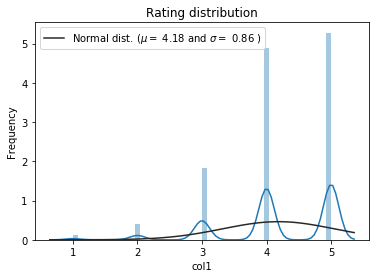

In [62]:
sns.distplot(df['col1'] , fit=norm);#别的分布？

(mu, sigma) = norm.fit(df['col1'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Rating distribution')


 mu = 38.76 and sigma = 22.82



Text(0.5,1,u'Rating distribution')

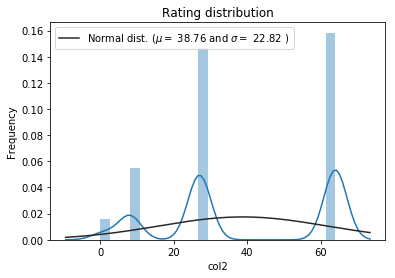

In [131]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#df["col2"] = np.log1p(df["col1"]+1000)
df["col2"] = (df["col1"]-1)**3
#Check the new distribution 
sns.distplot(df['col2'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['col2'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rating distribution')

In [129]:
def fx(x):
    return (x-1)**3

In [130]:
(fx(5)-fx(4))*1.0/(fx(4)-fx(3))

1.9473684210526316

In [167]:
#全体数据
bu=[0]*len(UserS)# list: average rating float
bi=[0]*len(BuzS)
alpha_T=sum([i['rating'] for i in data])/len(data)
for u in ubr:
    #if len(ubr[i])!=0:
    bu[u]=sum([i[1] for i in ubr[u]])*1.0/len(ubr[u])
for b in bur:
    #if len(BuzRlist[i])!=0:
    bi[b]=sum([i[1] for i in bur[b]])*1.0/len(bur[b])
bu=np.array(bu)
bi=np.array(bi)

## Gamma gu gi

正数

In [168]:
gu=np.matrix( [[((random.random())-0.5)/sqrt(K) for j in range(K)] for i in range(len(UserS))] )
gi=np.matrix( [[((random.random())-0.5)/sqrt(K) for j in range(K)] for i in range(len(BuzS))]  )

In [169]:
gu[0,0]*gi[0,0]

-0.020889150051697357

In [170]:
def testmse():
    MSE1=0;cskip=0
    for i in pairs_V:
        u=i[0];b=i[1];r=pairs_V[i]
        if bu[u]==0 or bi[b]==0:
            cskip+=1
            continue
        MSE1+= (r - alpha_T - bi[b] -bu[u]-pro(u,b,K,-1))**2
    print cskip
    MSE1/=(len(validate)-cskip)
    MSE1 = math.sqrt(MSE1)
    print "RMSE: ",MSE1

In [171]:
#全体数据了！
def pro(u,b,K,j):
    ans=float(gu[u]*gi[b].T)
    if j==-1:
        return ans
    else:
        return ans-gu[u,j]*gi[b,j]#numpy的操作

def ALS(lam):#输入alpha_T,train
    global alpha_T
    alphaold1=0
    count1=0
    while (abs(alpha_T-alphaold1)>1e-6):
        print '!'
        count1+=1
        alphaold1=alpha_T
        
        alphaold2=0
        count2=0
       
        while (abs(alpha_T-alphaold2)>1e-4):
            if count2>3:
                break
            alphaold2=alpha_T
            alpha_T=sum([ sum(r-bu[u]-bi[b]-pro(u,b,K,-1) for (b,r) in ubr[u]) for u in ubr])/len(data)
            for u in ubr:
                bu[u]=sum( r-alpha_T-bi[b] -pro(u,b,K,-1) for (b,r) in ubr[u] )/(lam+len(ubr[u]))
            for b in bur:
                bi[b]=sum( r-alpha_T-bu[u] -pro(u,b,K,-1) for (u,r) in bur[b] )/(lam+len(bur[b]))
            for u in ubr:
                tmp0=np.zeros((1,K)) ;tmp1=np.ones((1,K))*lam
                for (b,r) in ubr[u]:
                    tmp0+=(np.array(r-alpha_T-bi[b]-bu[u]-pro(u,b,K,-1)) + np.array(gu[u])*np.array(gi[b]) ) * np.array(gi[b]) 
                    tmp1+=np.array(gi[b])**2
                gu[u]=np.array(tmp0)/np.array(tmp1)
#                 for k in range(K):
#                     tmp0=sum( ( r-alpha_T-bi[b]-bu[u]-pro(u,b,K,k) )*gi[b,k] for (b,r) in ubr[u])
#                     tmp1=lam+sum(gi[b,k]**2 for (b,r) in ubr[u])
#                     gu[u,k]=tmp0/tmp1
            count2+=1
            print "first: ",alpha_T-alphaold2
        
        count3=0
        alphaold2=0
        while (abs(alpha_T-alphaold2)>1e-4):
            if count3>4:
                break
            alphaold2=alpha_T
            alpha_T=sum([ sum(r-bu[u]-bi[b]-pro(u,b,K,-1) for (b,r) in ubr[u]) for u in ubr])/len(data)
            for u in ubr:
                bu[u]=sum( r-alpha_T-bi[b] -pro(u,b,K,-1) for (b,r) in ubr[u] )/(lam+len(ubr[u]))
            for b in bur:
                bi[b]=sum( r-alpha_T-bu[u] -pro(u,b,K,-1) for (u,r) in bur[b] )/(lam+len(bur[b]))
            for b in bur:
                tmp0=np.zeros((1,K)) ;tmp1=np.ones((1,K))*lam
                #tmp0=np.zeros(K) ;tmp1=np.ones(K)*lam
                for (u,r) in bur[b]:
                    tmp0+=(np.array(r-alpha_T-bi[b]-bu[u]-pro(u,b,K,-1)) + np.array(gu[u])*np.array(gi[b])) * np.array(gu[u])
                    tmp1+=np.array(gu[u])**2
                gi[b]=np.array(tmp0)/np.array(tmp1)
                
#                 for k in range(K):
#                     tmp0=sum( ( r-alpha_T-bi[b]-bu[u]-pro(u,b,K,k) )*gu[u,k] for (u,r) in bur[b])
#                     tmp1=lam+sum(gu[u,k]**2 for (u,r) in bur[b])
#                     gi[b,k]=tmp0/tmp1
            count3+=1
            print "second: ",alpha_T-alphaold2
        print "inner loop:",count2,count3
        testmse()
    print "outter loop: ",count1," alpha_diff: ",alpha_T-alphaold1
        
        


In [174]:
K,alpha_T

(4, -4.0148726755265276)

In [180]:
ALS(0.3)

In [147]:
testmse()

0
RMSE:  0.465115613484


In [181]:
#训练数据
bu=[0]*len(UserS)# list: average rating float
bi=[0]*len(BuzS)
alpha_T=sum([i['rating'] for i in train])/len(train)
for u in ubr_T:
    #if len(ubr[i])!=0:
    bu[u]=sum([i[1] for i in ubr_T[u]])*1.0/len(ubr_T[u])
for b in bur_T:
    #if len(BuzRlist[i])!=0:
    bi[b]=sum([i[1] for i in bur_T[b]])*1.0/len(bur_T[b])
bu=np.array(bu)
bi=np.array(bi)
gu=np.matrix( [[((random.random())-0.5)/sqrt(K) for j in range(K)] for i in range(len(UserS))] )
gi=np.matrix( [[((random.random())-0.5)/sqrt(K) for j in range(K)] for i in range(len(BuzS))]  )

In [182]:
#训练数据
def pro(u,b,K,j):
    ans=float(gu[u]*gi[b].T)
    if j==-1:
        return ans
    else:
        return ans-gu[u,j]*gi[b,j]#numpy的操作

def ALS_T(lam):
    global alpha_T
    alphaold1=0
    count1=0
    while (abs(alpha_T-alphaold1)>1e-6):
        print '!'
        count1+=1
        alphaold1=alpha_T
        
        alphaold2=0
        count2=0
        while (abs(alpha_T-alphaold2)>1e-4):
            alphaold2=alpha_T
            alpha_T=sum([ sum(r-bu[u]-bi[b]-pro(u,b,K,-1) for (b,r) in ubr_T[u]) for u in ubr_T])/len(train)
            for u in ubr_T:
                bu[u]=sum( r-alpha_T-bi[b] -pro(u,b,K,-1) for (b,r) in ubr_T[u] )/(lam+len(ubr_T[u]))
            for b in bur_T:
                bi[b]=sum( r-alpha_T-bu[u] -pro(u,b,K,-1) for (u,r) in bur_T[b] )/(lam+len(bur_T[b]))
            for u in ubr_T:
                for k in range(K):
                    tmp0=sum( ( r-alpha_T-bi[b]-bu[u]-pro(u,b,K,k) )*gi[b,k] for (b,r) in ubr_T[u])
                    tmp1=lam+sum(gi[b,k]**2 for (b,r) in ubr_T[u])
                    gu[u,k]=tmp0/tmp1
            count2+=1
            print "first: ",alpha_T-alphaold2
        
        count3=0
        alphaold2=0
        while (abs(alpha_T-alphaold2)>1e-4):
            alphaold2=alpha_T
            alpha_T=sum([ sum(r-bu[u]-bi[b]-pro(u,b,K,-1) for (b,r) in ubr_T[u]) for u in ubr_T])/len(train)
            for u in ubr_T:
                bu[u]=sum( r-alpha_T-bi[b] -pro(u,b,K,-1) for (b,r) in ubr_T[u] )/(lam+len(ubr_T[u]))
            for b in bur_T:
                bi[b]=sum( r-alpha_T-bu[u] -pro(u,b,K,-1) for (u,r) in bur_T[b] )/(lam+len(bur_T[b]))
            for b in bur_T:
                for k in range(K):
                    tmp0=sum( ( r-alpha_T-bi[b]-bu[u]-pro(u,b,K,k) )*gu[u,k] for (u,r) in bur_T[b])
                    tmp1=lam+sum(gu[u,k]**2 for (u,r) in bur_T[b])
                    gi[b,k]=tmp0/tmp1
            count3+=1
            print "second: ",alpha_T-alphaold2
        print "inner loop:",count2,count3
        testmse()
    print "outter loop: ",count1," alpha_diff: ",alpha_T-alphaold1
        
        


In [185]:
K,alpha_T

(4, -3.3145190298932641)

In [187]:
ALS_T(0.3)

!
first:  0.145685535934
first:  0.14422010614
first:  0.14269403959
first:  0.141114048311
first:  0.139485150801
first:  0.137811928983
first:  0.136098786688
first:  0.134349976331
first:  0.132569583202
first:  0.130761509947
first:  0.128929467931
first:  0.127076974544
first:  0.125207354555
first:  0.123323744043
first:  0.121429095891
first:  0.119526186212
first:  0.117617621273
first:  0.115705844671
first:  0.113793144561
first:  0.111881660835
first:  0.109973392165
first:  0.108070202858
first:  0.106173829504
first:  0.10428588738
first:  0.102407876612
first:  0.100541188085
first:  0.098687109105
first:  0.0968468288069
first:  0.0950214433305
first:  0.0932119607545
first:  0.0914193058054
first:  0.0896443243473
first:  0.0878877876604
first:  0.0861503965179
first:  0.0844327850687
first:  0.0827355245356
first:  0.081059126735
first:  0.0794040474288
first:  0.0777706895136
first:  0.0761594060563
first:  0.0745705031818
first:  0.0730042428212
first:  0.07146084532

KeyboardInterrupt: 

In [86]:
# k =1
#RMSE:  0.75668
#alpha_T=4.2246373480958237
#bu  0.05382582,  0.22534968, -0.23802831,
#bi  0.48463682,  0.41892064,  0.27678282
#gu   -0.0029268 -0.036922206 -0.25349449
#gi -0.064 -0.05 0.27

#on data:
#RMSE:  0.763286476584

4.2246373480958237

In [186]:
testmse()

176
RMSE:  0.910025388736


In [98]:
#noUnoB=0
noUyesB=0
yesUnoB=0
predictions = open("predictions_Rating.txt", 'w')

for l in open("pairs_Rating.txt"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,b = l.strip().split('-')
    predictions.write(u + '-' + b + ',')
#     if u not in UserS2N and b not in BuzS2N: # 0
#         noUandB+=1
    if u not in UserS and b in BuzS: #11
        #tmp=sum(BuzRlist[BuzS2N[b]])*1.0/len(BuzRlist[BuzS2N[b]])
        b = BuzS2N[b]
        tmp=alpha_T+bi[b]
        if tmp>5:
            tmp=5
        
        predictions.write(str(tmp) + '\n')
        print '0',tmp
        noUyesB+=1
        continue
    if u in UserS and b not in BuzS:#13
        #tmp=sum(UserRlist[UserS2N[u]])*1.0/len(UserRlist[UserS2N[u]])
        u = UserS2N[u]
        tmp=alpha_T+bu[u]
        if tmp>5:
            tmp=5
        predictions.write(str(tmp) + '\n')  
        print '1',tmp
        yesUnoB+=1  
        continue
    
   
    u = UserS2N[u]
    b = BuzS2N[b]
    tmp=alpha_T+bu[u]+bi[b]+float(gu[u]*gi[b].T)
    if tmp>5:
        tmp=5
    if tmp<1:
        tmp=1
        print "<1" 
    predictions.write(str(tmp) + '\n')
predictions.close()
print noUyesB,yesUnoB

1 3.83899373701
1 4.18760592705
1 4.29900706045
0 3.93463090536
1 3.81346523615
1 4.09648651921
0 3.79692734585
1 4.32939900717
0 4.25563895959
1 3.96686346122
1 4.27162853303
1 4.301499129
0 4.35514989225
0 4.1987562243
0 4.01347793736
0 4.24277659333
0 4.06271780178
1 3.88651673817
1 4.35099158864
0 4.50741019312
1 4.40378234927
0 4.4159100373
1 3.84425622271
0 4.30585959163
11 13


In [103]:
ubr

defaultdict(list,
            {0: [(20959, 5.0),
              (13008, 4.0),
              (16061, 4.0),
              (9606, 5.0),
              (14462, 3.0),
              (5840, 4.0)],
             1: [(6799, 5.0),
              (802, 5.0),
              (14082, 5.0),
              (17199, 5.0),
              (6406, 4.0)],
             2: [(482, 4.0),
              (2561, 5.0),
              (4071, 4.0),
              (16756, 4.0),
              (4582, 4.0)],
             3: [(18513, 3.0), (16487, 3.0), (1878, 5.0), (9128, 4.0)],
             4: [(19241, 5.0),
              (14810, 5.0),
              (13599, 5.0),
              (1694, 5.0),
              (10744, 5.0),
              (3510, 5.0)],
             5: [(2556, 3.0),
              (9824, 5.0),
              (9273, 5.0),
              (14068, 3.0),
              (744, 4.0),
              (4017, 4.0),
              (6991, 4.0)],
             6: [(3650, 5.0),
              (5756, 5.0),
              (20822, 5.0),
             